In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight : bold;}
div.input {font-family:Consolas; font-size:12pt;}
</style>
"""))

<b><font color = "red" size = "6">ch12. 데이터프레임과 시리즈(Pandas)</font></b>
- pip install pandas
- conda install pandas

# 8절. 데이터 그룹화 및 집계

In [3]:
import pandas as pd
import numpy as np
from statsmodels.api import datasets

iris_df = datasets.get_rdataset('iris').data
iris_df.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa


## 8.1 Group by

In [4]:
iris_group = iris_df.groupby(iris_df.Species)

iris_group_sum = iris_group.sum()
iris_group_sum

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [5]:
iris_group_sum.reset_index() # index를 컬럼 데이터로 편입

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


In [6]:
iris_df.groupby(['Species']).sum()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [7]:
# 종 별 'Sepal.Length'의 합계
# iris_df.groupby(['인덱스로 사용할 컬럼명'])['원하는 컬럼 명'].연산함수()
iris_df.groupby(['Species'])['Sepal.Length'].sum() # 결과가 시리즈

Species
setosa        250.3
versicolor    296.8
virginica     329.4
Name: Sepal.Length, dtype: float64

In [8]:
iris_df.pivot_table(index = 'Species', 
                    values = ['Sepal.Length'], 
                    aggfunc = 'sum') # 결과가 데이터프레임

,Sepal.Length
Species,
setosa,250.3
versicolor,296.8
virginica,329.4


In [11]:
iris_df.loc[1, 'Sepal.Length'] = np.nan
iris_df.groupby('Species')['Sepal.Length'].count()

Species
setosa        49
versicolor    50
virginica     50
Name: Sepal.Length, dtype: int64

In [12]:
iris_df['Species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

In [48]:
# 다중열로 그룹화

In [14]:
r = iris_df.groupby(['Species', 'Sepal.Length']).sum()
r.loc['setosa']

,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,,,
4.3,3.0,1.1,0.1
4.4,9.1,4.0,0.6
4.5,2.3,1.3,0.3
4.6,13.3,5.3,0.9
4.7,6.4,2.9,0.4
4.8,15.9,7.9,1.0
4.9,9.8,4.4,0.4
5.0,26.9,11.6,2.3
5.1,28.8,12.5,2.5


In [15]:
iris_df.groupby(['Species']).describe()

Sepal.Length                                            ... Petal.Width                                   
                  count      mean       std  min    25%  50%  75%  ...        mean       std  min  25%  50%  75%  max
Species                                                            ...                                               
setosa             49.0  5.008163  0.355807  4.3  4.800  5.0  5.2  ...       0.246  0.105386  0.1  0.2  0.2  0.3  0.6
versicolor         50.0  5.936000  0.516171  4.9  5.600  5.9  6.3  ...       1.326  0.197753  1.0  1.2  1.3  1.5  1.8
virginica          50.0  6.588000  0.635880  4.9  6.225  6.5  6.9  ...       2.026  0.274650  1.4  1.8  2.0  2.3  2.5

[3 rows x 32 columns]

In [16]:
g = iris_df.groupby('Species').mean()
g

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.008163,3.428,1.462,0.246
versicolor,5.936000,2.770,4.260,1.326
virginica,6.588000,2.974,5.552,2.026


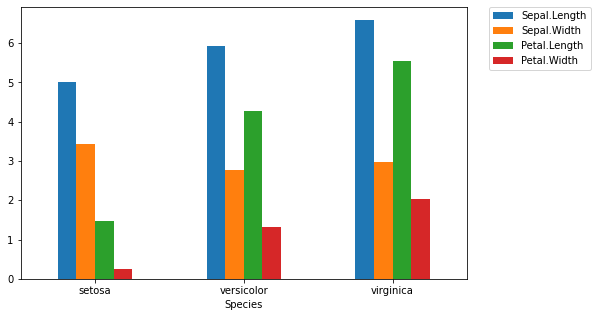

In [23]:
import matplotlib.pyplot as plt
g.plot(kind = 'bar', rot = 0, figsize = (8, 5))
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

In [24]:
# Species, Petal.Width 별 mean()
g = iris_df.groupby(['Species', 'Petal.Width']).mean()

g

Sepal.Length  Sepal.Width  Petal.Length
Species    Petal.Width                                         
setosa     0.1              4.820000     3.360000      1.380000
           0.2              4.975000     3.379310      1.444828
           0.3              4.971429     3.328571      1.428571
           0.4              5.300000     3.785714      1.571429
           0.5              5.100000     3.300000      1.700000
           0.6              5.000000     3.500000      1.600000
versicolor 1.0              5.414286     2.371429      3.628571
           1.1              5.400000     2.466667      3.566667
           1.2              5.780000     2.740000      4.240000
           1.3              5.884615     2.746154      4.176923
           1.4              6.357143     2.957143      4.500000
           1.5              6.190000     2.880000      4.580000
           1.6              6.100000     3.133333      4.766667
           1.7              6.700000     3.000000      5.000000
           1.8              5.900000     3.200000      4.800000
virginica  1.4              6.100000     2.600000      5.600000
           1.5              6.150000     2.500000      5.050000
           1.6              7.200000     3.000000      5.800000
           1.7              4.900000     2.500000      4.500000
           1.8              6.445455     2.918182      5.381818
           1.9              6.340000     2.680000      5.320000
           2.0              6.650000     3.016667      5.550000
           2.1              6.916667     3.033333      5.783333
           2.2              6.866667     3.200000      6.033333
           2.3              6.912500     3.087500      5.700000
           2.4              6.266667     3.100000      5.433333
           2.5              6.733333     3.400000      5.933333

In [25]:
# 앞에 있는 인덱스만 두고 끝의 인덱스를 컬럼 값 올려
g.unstack()

Sepal.Length                                  ... Petal.Length                                             
Petal.Width          0.1    0.2       0.3  0.4  0.5  0.6  ...          2.0       2.1       2.2  2.3       2.4       2.5
Species                                                   ...                                                          
setosa              4.82  4.975  4.971429  5.3  5.1  5.0  ...          NaN       NaN       NaN  NaN       NaN       NaN
versicolor           NaN    NaN       NaN  NaN  NaN  NaN  ...          NaN       NaN       NaN  NaN       NaN       NaN
virginica            NaN    NaN       NaN  NaN  NaN  NaN  ...         5.55  5.783333  6.033333  5.7  5.433333  5.933333

[3 rows x 66 columns]

In [26]:
g.unstack().T

Species                     setosa  versicolor  virginica
             Petal.Width                                 
Sepal.Length 0.1          4.820000         NaN        NaN
             0.2          4.975000         NaN        NaN
             0.3          4.971429         NaN        NaN
             0.4          5.300000         NaN        NaN
             0.5          5.100000         NaN        NaN
...                            ...         ...        ...
Petal.Length 2.1               NaN         NaN   5.783333
             2.2               NaN         NaN   6.033333
             2.3               NaN         NaN   5.700000
             2.4               NaN         NaN   5.433333
             2.5               NaN         NaN   5.933333

[66 rows x 3 columns]

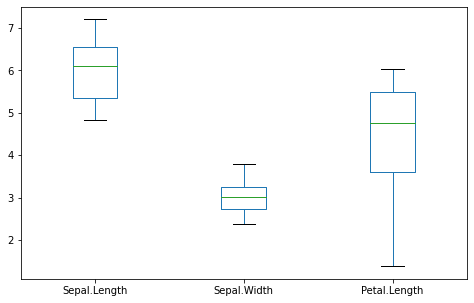

In [30]:
g.plot(kind = 'box', figsize = (8,5))
plt.show()

In [32]:
# Species, Petal.Width별 Sepal.length의 평균
g = iris_df.groupby(['Species', 'Petal.Width'])['Sepal.Length'].mean()

g # 시리즈로 반환됨

Species     Petal.Width
setosa      0.1            4.820000
            0.2            4.975000
            0.3            4.971429
            0.4            5.300000
            0.5            5.100000
            0.6            5.000000
versicolor  1.0            5.414286
            1.1            5.400000
            1.2            5.780000
            1.3            5.884615
            1.4            6.357143
            1.5            6.190000
            1.6            6.100000
            1.7            6.700000
            1.8            5.900000
virginica   1.4            6.100000
            1.5            6.150000
            1.6            7.200000
            1.7            4.900000
            1.8            6.445455
            1.9            6.340000
            2.0            6.650000
            2.1            6.916667
            2.2            6.866667
            2.3            6.912500
            2.4            6.266667
            2.5            6.733333
Name

In [33]:
g.unstack()

Petal.Width,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
Species,,,,,,,,,,,,,,,,,,,,,,
setosa,4.82,4.975,4.971429,5.3,5.1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
versicolor,NaN,NaN,NaN,NaN,NaN,NaN,5.414286,5.4,5.78,5.884615,6.357143,6.19,6.1,6.7,5.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virginica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.100000,6.15,7.2,4.9,6.445455,6.34,6.65,6.916667,6.866667,6.9125,6.266667,6.733333


In [34]:
pd.options.display.max_columns = 23

In [35]:
g.unstack().T

Species,setosa,versicolor,virginica
Petal.Width,,,
0.1,4.820000,NaN,NaN
0.2,4.975000,NaN,NaN
0.3,4.971429,NaN,NaN
0.4,5.300000,NaN,NaN
0.5,5.100000,NaN,NaN
0.6,5.000000,NaN,NaN
1.0,NaN,5.414286,NaN
1.1,NaN,5.400000,NaN
1.2,NaN,5.780000,NaN


## 8.2 그룹간 데이터 처리

In [36]:
iris_group = iris_df.groupby(['Species'])

iris_group

In [37]:
for idx, (speciesname, group) in enumerate(iris_group):
    print(idx, '번째 그룹은', speciesname)
    print(group)
    print('■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■')

0 번째 그룹은 setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0            5.1          3.5           1.4          0.2  setosa
1            NaN          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14       

In [41]:
for idx, (speciesname, group) in enumerate(iris_group):
    print(idx, '번째 그룹은', speciesname)
    print(group.sample(5).sort_index())
    print('■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■')

0 번째 그룹은 setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
28           5.2          3.4           1.4          0.2  setosa
34           4.9          3.1           1.5          0.2  setosa
37           4.9          3.6           1.4          0.1  setosa
38           4.4          3.0           1.3          0.2  setosa
40           5.0          3.5           1.3          0.3  setosa
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
1 번째 그룹은 versicolor
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
60           5.0          2.0           3.5          1.0  versicolor
61           5.9          3.0           4.2          1.5  versicolor
74           6.4          2.9           4.3          1.3  versicolor
81           5.5          2.4           3.7          1.0  versicolor
90           5.5          2.6           4.4          1.2  versicolor
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
2 번째 그룹은 virginica
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Specie

## 8.3 데이터프레임 그룹 인덱싱

In [46]:
for idx, (speciesname, group) in enumerate(iris_group):
    print(idx, '번째 그룹은', speciesname)
    print(group.iloc[[1, 11, 21, 31]])
    print('〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓')
    
t = iris_df.groupby('Species').take([1, 11, 21, 31])

0 번째 그룹은 setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1            NaN          3.0           1.4          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
21           5.1          3.7           1.5          0.4  setosa
31           5.4          3.4           1.5          0.4  setosa
〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓
1 번째 그룹은 versicolor
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
51           6.4          3.2           4.5          1.5  versicolor
61           5.9          3.0           4.2          1.5  versicolor
71           6.1          2.8           4.0          1.3  versicolor
81           5.5          2.4           3.7          1.0  versicolor
〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓
2 번째 그룹은 virginica
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
101           5.8          2.7           5.1          1.9  virginica
111           6.4          2.7           5.3          1.9  virg

In [47]:
t.loc['setosa']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,NaN,3.0,1.4,0.2
11,4.8,3.4,1.6,0.2
21,5.1,3.7,1.5,0.4
31,5.4,3.4,1.5,0.4


## 8.4 레이블(원핫인코딩)

In [49]:
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,NaN,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
iris_df.Species.describe()

count        150
unique         3
top       setosa
freq          50
Name: Species, dtype: object

In [54]:
# 레이블(원핫인코딩)을 지원하는 패키지 이용
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

iris_df['target'] = le.fit_transform(iris_df.Species)
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,NaN,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


# 9절. 데이터구조 변경

## 9.1 와이드 포맷 vs 롱 포맷
- 판다스 공식 문서에 나오는 melt : https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt
- [Tidy Data 란?](https://vita.had.co.nz/papers/tidy-data.pdf)

In [55]:
import statsmodels.api as sm
airquality = sm.datasets.get_rdataset('airquality', package = 'datasets').data

airquality

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


## 9.2 melt를 이용한 언피벗팅
- 와이드 포맷 데이터 -> 롱 포맷 데이터로 변환

In [58]:
airquality_melted = airquality.melt(id_vars=['Month', 'Day'])

airquality_melted

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [59]:
airquality.melt(id_vars = ['Month', 'Day'], 
                var_name = '변수', 
                value_name = '값')

,Month,Day,변수,값
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [60]:
airquality_melted_sort = airquality_melted.sort_values(by = ['Month', 'Day'])

airquality_melted_sort

,Month,Day,variable,value
0,5,1,Ozone,41.0
153,5,1,Solar.R,190.0
306,5,1,Wind,7.4
459,5,1,Temp,67.0
1,5,2,Ozone,36.0
...,...,...,...,...
610,9,29,Temp,76.0
152,9,30,Ozone,20.0
305,9,30,Solar.R,223.0
458,9,30,Wind,11.5


## 9.3 pivot_table을 이용한 피벗팅

In [61]:
# melt된 데이터프레임 : airquality_melted, airquality_melted_sort

In [63]:
airquality2 = airquality_melted.pivot_table(index = ['Month', 'Day'], 
                                            columns = ['variable'], 
                                            values = ['value'])

airquality2.head()

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3

In [64]:
airquality2.index

MultiIndex([(5,  1),
            (5,  2),
            (5,  3),
            (5,  4),
            (5,  5),
            (5,  6),
            (5,  7),
            (5,  8),
            (5,  9),
            (5, 10),
            ...
            (9, 21),
            (9, 22),
            (9, 23),
            (9, 24),
            (9, 25),
            (9, 26),
            (9, 27),
            (9, 28),
            (9, 29),
            (9, 30)],
           names=['Month', 'Day'], length=153)

In [ ]:
# ▶ 인덱스(=행 이름)를 데이터에 편입
airquality2 = airquality2.reset_index(level = ['Month', 'Day'], 
                                      col_level = 1)

airquality2.head()

In [66]:
airquality2.columns = airquality2.columns.droplevel(level = 0)
airquality2

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


In [69]:
airquality3 = airquality_melted_sort.pivot_table(index = ['Month','Day'], columns = ['variable'], 
                                                 values = ['value'])
airquality3.head(4)

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5

In [70]:
airquality3 = airquality3.reset_index(level = ['Month', 'Day'], col_level = 1)

airquality3

value                    
variable Month Day Ozone Solar.R  Temp  Wind
0            5   1  41.0   190.0  67.0   7.4
1            5   2  36.0   118.0  72.0   8.0
2            5   3  12.0   149.0  74.0  12.6
3            5   4  18.0   313.0  62.0  11.5
4            5   5   NaN     NaN  56.0  14.3
..         ...  ..   ...     ...   ...   ...
148          9  26  30.0   193.0  70.0   6.9
149          9  27   NaN   145.0  77.0  13.2
150          9  28  14.0   191.0  75.0  14.3
151          9  29  18.0   131.0  76.0   8.0
152          9  30  20.0   223.0  68.0  11.5

[153 rows x 6 columns]

In [72]:
airquality3.columns = airquality3.columns.droplevel(level = 0)
airquality3

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


In [73]:
#################################### 연습문제 #############################################
# 2013년부터 2015년(df_first) : 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv
# 2015년부터 2021년(df_last) : 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210531.csv
# concat을 2013년도부터 2015년까지의 지역명, 연도월(2015년 10월), 평당분양가격으로 조인하여
# 하나의 Dataframe으로 생성
# hint : melt, pd.to_numeric(df_last['열 이름'], errors = 'coerce'),
#        df_last의 연도와 월 열을 연결하여 2015년 dataframe['열 이름'].strfind('d')

In [53]:
df_first = pd.read_csv('D:/Gray_Bigdata/Downloads/sharedData/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                       encoding = 'CP949')
df_last = pd.read_csv('D:/Gray_Bigdata/Downloads/sharedData/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210531.csv', 
                      encoding = 'CP949')

df_first.head(2)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [54]:
df_first_melt = df_first.melt(id_vars = '지역', 
                              var_name = '연도월',
                              value_name = '평당분양가격')

df_first_melt

,지역,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [55]:
df_first_melt.columns = ['지역명', '연도월','평당분양가격']

df_first_melt

,지역명,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [52]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      5780 non-null   object
 1   규모구분     5780 non-null   object
 2   연도       5780 non-null   int64 
 3   월        5780 non-null   int64 
 4   분양가격(㎡)  5331 non-null   object
dtypes: int64(2), object(3)
memory usage: 225.9+ KB


In [56]:
# 열 별 Null 갯수
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    449
dtype: int64

In [57]:
 df_last['연도월'] = df_last['연도'].astype('str') + '년' + df_last['월'].astype('str') + '월'

In [58]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),연도월
0,서울,모든면적,2015,10,5841,2015년10월
1,서울,전용면적 60㎡이하,2015,10,5652,2015년10월
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,2015년10월
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,2015년10월
4,서울,전용면적 102㎡초과,2015,10,5879,2015년10월


In [ ]:
df_last[df_last['분양가격(㎡)'].str.strip() == '']

In [ ]:
df_last[(df_last['분양가격(㎡)'].str.find(',') != -1) & df_last['분양가격(㎡)'].notnull()]

In [64]:
df_last['분양가격(㎡)'] = pd.to_numeric(df_last['분양가격(㎡)'], errors = 'coerce')

In [65]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      5780 non-null   object 
 1   규모구분     5780 non-null   object 
 2   연도       5780 non-null   int64  
 3   월        5780 non-null   int64  
 4   분양가격(㎡)  5239 non-null   float64
 5   연도월      5780 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 271.1+ KB


In [68]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    541
연도월          0
dtype: int64

In [69]:
df_last['평당분양가격'] = df_last['분양가격(㎡)'] * 3.3

df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),연도월,평당분양가격
0,서울,모든면적,2015,10,5841.0,2015년10월,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,2015년10월,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,2015년10월,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,2015년10월,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,2015년10월,19400.7


In [71]:
new_last = df_last.drop(['규모구분', '연도', '월', '분양가격(㎡)'], axis = 1)

new_last.head()

,지역명,연도월,평당분양가격
0,서울,2015년10월,19275.3
1,서울,2015년10월,18651.6
2,서울,2015년10월,19410.6
3,서울,2015년10월,18879.3
4,서울,2015년10월,19400.7


In [72]:
# concat
result = pd.concat([df_first_melt, new_last], axis = 0)

result

,지역명,연도월,평당분양가격
0,서울,2013년12월,18189.0
1,부산,2013년12월,8111.0
2,대구,2013년12월,8080.0
3,인천,2013년12월,10204.0
4,광주,2013년12월,6098.0
...,...,...,...
5775,제주,2021년5월,24783.0
5776,제주,2021년5월,NaN
5777,제주,2021년5월,24740.1
5778,제주,2021년5월,NaN


In [ ]:
#################################### 예제 #############################################

### pivot_table(), pivot() 함수의 차이

In [76]:
import numpy as np
year      = [2020, 2020, 2020, 2021, 2021, 2021]
month     = [1, 2, 3] * 2
latte     = range(400, 406)
americano = [500, 483, 484, 470, 486, 488]
mocha     = [350, 299, 300, 301, 302, 300]

sales     = pd.DataFrame(np.c_[year, month, latte, americano, mocha], 
                         columns = ['year', 'month', 'latte', 'americano', 'mocha'])
sales

,year,month,latte,americano,mocha
0,2020,1,400,500,350
1,2020,2,401,483,299
2,2020,3,402,484,300
3,2021,1,403,470,301
4,2021,2,404,486,302
5,2021,3,405,488,300


In [77]:
pd.pivot_table(sales, index = 'year', 
               values = ['latte', 'americano', 'mocha'], 
               aggfunc = sum)

,americano,latte,mocha
year,,,
2020,1467,1203,949
2021,1444,1212,903


In [80]:
latte_sales = sales.loc[:, 'year':'latte'] # 모든 행, year열부터 latte열까지

latte_sales

,year,month,latte
0,2020,1,400
1,2020,2,401
2,2020,3,402
3,2021,1,403
4,2021,2,404
5,2021,3,405


In [81]:
latte_sales.pivot(index = 'year', columns = 'month')

latte          
month     1    2    3
year                 
2020    400  401  402
2021    403  404  405

# 10절. 데이터프레임에 함수 적용시키기

## 10.1 apply
- 데이터프레임이나 series에 각 열 또는 행에 함수를 적용

In [84]:
from statsmodels.api import datasets
iris_df = datasets.get_rdataset('iris', package = 'datasets').data

iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [85]:
# 독립변수 X
X = iris_df.loc[:, 'Sepal.Length':'Petal.Width']
# X = iris_df.iloc[, :-1]

X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [86]:
import numpy as np
np.average([1, 2, 3, 4])

2.5

In [87]:
np.floor([1.9, 2.8])

array([1., 2.])

In [90]:
# 소수점 두자리에서 반올림
np.round([1.544, 2.956], 2) 

array([1.54, 2.96])

In [91]:
# 행별로 반올림
X.apply(np.round)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


In [92]:
# 열별 합계
X.apply(np.sum, axis = 0)

Sepal.Length    876.5
Sepal.Width     458.6
Petal.Length    563.7
Petal.Width     179.9
dtype: float64

In [93]:
# 행별 합계
X.apply(np.sum, axis = 1)

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    17.2
146    15.7
147    16.7
148    17.3
149    15.8
Length: 150, dtype: float64

In [94]:
# 각 데이터와 평균과의 거리를 출력
avg = X.apply(np.average)

avg

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [96]:
# X.loc[0]과 평균값과의 거리 계산
X.loc[0] - avg

Sepal.Length   -0.743333
Sepal.Width     0.442667
Petal.Length   -2.358000
Petal.Width    -0.999333
dtype: float64

In [97]:
def fun(x):
    return x - avg

fun(X.loc[0])

Sepal.Length   -0.743333
Sepal.Width     0.442667
Petal.Length   -2.358000
Petal.Width    -0.999333
dtype: float64

In [98]:
X.apply(lambda x : x-avg, axis = 1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [99]:
# 각 데이터와 평균과의 거리를 리스트 형태로 출력
X.apply(lambda x : list(round(x-avg, 2)), axis = 1)

0       [-0.74, 0.44, -2.36, -1.0]
1      [-0.94, -0.06, -2.36, -1.0]
2       [-1.14, 0.14, -2.46, -1.0]
3       [-1.24, 0.04, -2.26, -1.0]
4       [-0.84, 0.54, -2.36, -1.0]
                  ...             
145       [0.86, -0.06, 1.44, 1.1]
146       [0.46, -0.56, 1.24, 0.7]
147       [0.66, -0.06, 1.44, 0.8]
148        [0.36, 0.34, 1.64, 1.1]
149       [0.06, -0.06, 1.34, 0.6]
Length: 150, dtype: object

## 10.2 applymap
- apply : 행 or 열단위로 함수를 적용하고 싶을 때 사용(데이터프레임이나 시리즈 적용 가능)
- applymap : 각각의 요소별로 적용하고 싶을 때 사용(시리즈는 불가능)
- map : (시리즈에서만 가능)

In [100]:
X.applymap(np.round)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


In [102]:
X.applymap(lambda x : x**2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04
...,...,...,...,...
145,44.89,9.00,27.04,5.29
146,39.69,6.25,25.00,3.61
147,42.25,9.00,27.04,4.00
148,38.44,11.56,29.16,5.29


## 10.3 map
- series 타입의 vector만 가능

In [104]:
x = pd.Series(['마속', 20, '서울시 마포구'], index = ['이름', '나이', '주소'])

x

이름         마속
나이         20
주소    서울시 마포구
dtype: object

In [106]:
def my_func(data):
    return data, len(str(data))

In [108]:
my_func('서울시 마포구')

('서울시 마포구', 7)

In [109]:
x.map(my_func)

이름         (마속, 2)
나이         (20, 2)
주소    (서울시 마포구, 7)
dtype: object

In [110]:
x.map(lambda data : (data, len(str(data))) )

이름         (마속, 2)
나이         (20, 2)
주소    (서울시 마포구, 7)
dtype: object

In [111]:
s = pd.Series([1, 2, 3, 4, None])

In [112]:
s.map(lambda x : (x, x**2))

0     (1.0, 1.0)
1     (2.0, 4.0)
2     (3.0, 9.0)
3    (4.0, 16.0)
4     (nan, nan)
dtype: object

In [113]:
# 결측치는 연산적용이 안되도록
s.map(lambda x : (x, x**2), na_action = 'ignore')

0     (1.0, 1.0)
1     (2.0, 4.0)
2     (3.0, 9.0)
3    (4.0, 16.0)
4            NaN
dtype: object

In [115]:
df_first_melt['연도월']

0      2013년12월
1      2013년12월
2      2013년12월
3      2013년12월
4      2013년12월
         ...   
352     2015년8월
353     2015년8월
354     2015년8월
355     2015년8월
356     2015년8월
Name: 연도월, Length: 357, dtype: object

In [120]:
data = '2013년12월'
int(data.split('년')[0])

2013

In [121]:
data.split('년')[-1].replace('월', '')

'12'

In [122]:
df_first_melt['연도'] = df_first_melt['연도월'].apply(lambda data : int(data.split('년')[0]))

In [123]:
df_first_melt['월'] = df_first_melt['연도월'].apply(lambda data : 
                                                int(data.split('년')[-1].replace('월', '')))

In [124]:
df_first_melt

,지역명,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8
353,전남,2015년8월,6289,2015,8
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8


# 11절. 일괄변경
- 결측치 or 특정값을 일괄적으로 변경

## 11.1 fillna
- 결측치를 특정값으로 바꾼다

In [125]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0], 
                  [3, 4, np.nan, 1], 
                  [np.nan, 3, np.nan, 5],
                  [np.nan, 3, np.nan, 4]], 
                  columns = list('ABCD'))
df

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [126]:
# 모든 결측치를 무조건 0으로 바꿈
df.fillna(0) # fill채우다, na결측치

,A,B,C,D
0,0.0,2,0.0,0
1,3.0,4,0.0,1
2,0.0,3,0.0,5
3,0.0,3,0.0,4


In [127]:
# 결측치를 이전 값이나 다음 값으로 채움
    # method = pad / ffill -> 결측치가 이전 값으로 대치
    # method = backfill / bfill -> 결측치가 다음 값으로 대치
df.fillna(method = 'ffill')

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [128]:
df.fillna(method = 'bfill')

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [130]:
# 열 별 결측치 대체값이 다른 경우
    # 열 별 결측치 대체 값 설정
values = {'A':99, 'B':50, 'C':0, 'D':95}
df.fillna(value = df.median())

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [131]:
df.fillna(value = df.mean()) # 모두 결측치인 C열은 대체가 안된다.

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [132]:
df.fillna(value = values, limit = 3) # 3번째 결측치까지만 대체

,A,B,C,D
0,99.0,2,0.0,0
1,3.0,4,0.0,1
2,99.0,3,0.0,5
3,99.0,3,NaN,4


## 11.2 replace(to_value, new_value, inplace = False)
    - to_value를 new_value로 변경
    - inplace = False : 변경된 내용을 반환O, 데이터프레임 적용X
    -         = True : 변경된 내용 반환X, 데이터프레임 적용O
    - 정규표현식 이용 가능

In [142]:
s = pd.Series([0, 1, 2, 3, 4, None])

s.replace(np.nan, 0, inplace = True)
s.replace([0, 1], 5, inplace = True) # 0과 1을 5로 변경

s

0    5.0
1    5.0
2    2.0
3    3.0
4    4.0
5    5.0
dtype: float64

In [143]:
s = pd.Series([0, 1, 2, 3, 4, None])
s.replace(range(0, 3),range(100, 103), inplace = True)

s

0    100.0
1    101.0
2    102.0
3      3.0
4      4.0
5      NaN
dtype: float64

In [145]:
df = pd.DataFrame({'A':['bat', 'foo', 'bait'], 
                  'B':['abc', 'bar', 'xyz']})

df

,A,B
0,bat,abc
1,foo,bar
2,bait,xyz


In [146]:
# to_value에 값, 정규표현식(regex = True 인자 추가)
df.replace({'A':'bat', 
            'B':'xyz'}, 'XXX')

,A,B
0,XXX,abc
1,foo,bar
2,bait,XXX


In [147]:
df.replace(r'^ba.+$', 'NEW', regex = True)

,A,B
0,NEW,abc
1,foo,NEW
2,NEW,xyz


## 11.3 where, mask
    * where(조건, 만족하지 않을시 대체 값) : 조건이 만족하는 요소는 그대로 출력, else : NaN
    * mask(조건, 만족하지 않을시 대체 값) : 조건이 만족하는 요소만 NaN으로 치환

In [148]:
s = pd.Series(range(10, 15))

s

0    10
1    11
2    12
3    13
4    14
dtype: int64

In [152]:
s.where(s > 11, -9) # 만족하는 값만 보여준다.

0    -9
1    -9
2    12
3    13
4    14
dtype: int64

In [151]:
s.mask(s > 11, -9) # 만족하지 않는 값만 보여준다.

0    10
1    11
2    -9
3    -9
4    -9
dtype: int64

## 11.4 dropna
    - 결측치가 있는 데이터를 누락시킨다

In [153]:
df = pd.DataFrame({'name':['박', '김', '최', np.nan], 
                   'age':[np.nan, 20, 30, np.nan], 
                   'born':['서울', '부산', np.nan, np.nan]})
df

,name,age,born
0,박,NaN,서울
1,김,20.0,부산
2,최,30.0,NaN
3,NaN,NaN,NaN


In [155]:
df.dropna(how = 'all', inplace = True) # 기본적으로 행 단위로 결측치가 지워진다.

df

,name,age,born
0,박,NaN,서울
1,김,20.0,부산
2,최,30.0,NaN


In [156]:
df.dropna(axis = 1, how = 'any')

,name
0,박
1,김
2,최


# 12절 시리즈(1차원 데이터)
    * 데이터프레임(2차원데이터)

In [157]:
# series
s = pd.Series([1000, 7000, 5000, 2000, 1500], 
              index = ['apple', 'banana', 'mango', 'cherry', 'orange'])
s

apple     1000
banana    7000
mango     5000
cherry    2000
orange    1500
dtype: int64

In [158]:
s['apple']

1000

In [160]:
s['apple':'mango']

apple     1000
banana    7000
mango     5000
dtype: int64

In [162]:
# series에 data추가
s['watermelon'] = 10000

s

apple          1000
banana         7000
mango          5000
cherry         2000
orange         1500
watermelon    10000
dtype: int64

In [164]:
s.drop('watermelon', inplace = True)
 
s

apple     1000
banana    7000
mango     5000
cherry    2000
orange    1500
dtype: int64

In [165]:
# 값을 기준으로 정렬 : 오름차순
s.sort_values()

apple     1000
orange    1500
cherry    2000
mango     5000
banana    7000
dtype: int64

In [166]:
# 값을 기준으로 정렬 : 내림차순
s.sort_values(ascending = False)

banana    7000
mango     5000
cherry    2000
orange    1500
apple     1000
dtype: int64

In [167]:
# series를 dataframe으로 변환
s.to_frame()

,0
apple,1000
banana,7000
mango,5000
cherry,2000
orange,1500


In [168]:
s.to_frame(name = 'price')

,price
apple,1000
banana,7000
mango,5000
cherry,2000
orange,1500


In [ ]:
############################### 예제 #########################################
# iris 데이터를 random하게 인위적으로 열 마다 20개씩 할당한 후 평균 값으로 대체

In [169]:
# iris 가져오기
import seaborn as sns
iris = sns.load_dataset('iris')

iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [ ]:
# iris 가져오기
from sklearn import datasets
iris_dic = datasets.load_iris()

iris_dic

x = pd.DataFrame(iris_dic.data, 
                 columns = [col[:-4].strip().replace(' ','_') for col in iris_dic.feature_names])
y = iris_dic.target_names[iris_dic.target]

iris = pd.concat([x,y], axis = 1)
iris

In [178]:
# iris 가져오기
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data

iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [205]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [206]:
import random

for col in range(iris.shape[1]-1):
    iris.iloc[random.sample(range(len(iris)), 20), col] = np.nan

In [207]:
# 최대한 출력할 수 있는 행 수
pd.options.display.max_rows = 151

In [208]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,NaN,1.4,0.2,setosa
1,4.9,NaN,1.4,0.2,setosa
2,4.7,NaN,1.3,0.2,setosa
3,NaN,3.1,1.5,NaN,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,NaN,setosa
6,NaN,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,NaN,0.1,setosa


In [209]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  130 non-null    float64
 1   Sepal.Width   130 non-null    float64
 2   Petal.Length  130 non-null    float64
 3   Petal.Width   130 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [210]:
iris.isnull().sum()

Sepal.Length    20
Sepal.Width     20
Petal.Length    20
Petal.Width     20
Species          0
dtype: int64

In [331]:
# 결측치를 평균값으로 대체
avg = iris.mean(axis=0)
#     iris.loc[:,'sepal_length':'petal_width'].apply(np.average)은 결측치가 있어서 안 됨
avg

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [332]:
iris = iris.fillna(value = avg)

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# 실습문제

In [297]:
# 1.
import seaborn as sns
iris = sns.load_dataset('iris')
type(iris)

pandas.core.frame.DataFrame

In [230]:
iris.iloc[0:5, :]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [231]:
# 2.
X = iris.iloc[:, 0:3]
Y = iris.iloc[:, -1]

# # loc이용
# X = iris.loc[:,'sepal_length':'petal_width']
# y=iris.loc[:,'species']

# # 위의 어떤 방법을 쓰던 y는 Series
# y=iris.loc[:,'species'].to_frame()

In [236]:
# 3.
temp = iris.iloc[0:50, :]
# temp = iris.head(50)
# temp = iris.iloc[:50]
# temp = iris[:50]

temp

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [333]:
# 4.
temp.describe(include=['float64','object'])
temp.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,50.00000,50.000000,50.000000,50.000000,50
unique,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.00600,3.428000,1.462000,0.246000,NaN
std,0.35249,0.379064,0.173664,0.105386,NaN
min,4.30000,2.300000,1.000000,0.100000,NaN
25%,4.80000,3.200000,1.400000,0.200000,NaN
50%,5.00000,3.400000,1.500000,0.200000,NaN
75%,5.20000,3.675000,1.575000,0.300000,NaN


In [241]:
# 5.
iris_versicolor = iris.loc[iris['species'] == 'versicolor']
# iris_versicolor = iris.loc[iris.species=='versicolor']
# iris_versicolor = iris[iris.species=='versicolor']

iris_versicolor

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [244]:
# 6.
iris_df = pd.concat([X,Y], axis = 1)

iris_df

,sepal_length,sepal_width,petal_length,species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
2,4.7,3.2,1.3,setosa
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa
5,5.4,3.9,1.7,setosa
6,4.6,3.4,1.4,setosa
7,5.0,3.4,1.5,setosa
8,4.4,2.9,1.4,setosa
9,4.9,3.1,1.5,setosa


In [250]:
# 7.
iris.mean(axis = 0)

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [340]:
# 8.
r = iris.corr()

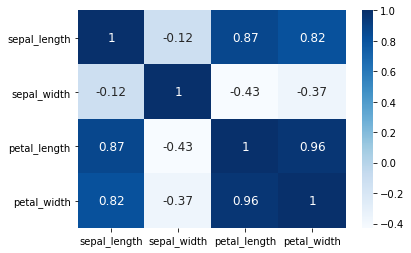

In [343]:
# 상관관계를 시각화
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(r, annot = True, cmap = 'Blues', annot_kws={'size' : 12})
plt.show()

In [335]:
# 9.
B = iris.loc[:, 'sepal_length':'petal_width']
avg = B.apply(np.average)

avg

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [271]:
B.apply(lambda x : x-avg, axis = 1).head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333


In [337]:
# 10.
iris.pivot_table(index='species', 
                 values=['sepal_length','sepal_width','petal_length','petal_width'])

,petal_length,petal_width,sepal_length,sepal_width
species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


In [344]:
iris_mean_by_species = iris.pivot_table(index='species')
iris_mean_by_species

,petal_length,petal_width,sepal_length,sepal_width
species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


In [352]:
# 11.
iris_mean_by_species = iris.groupby(iris.species).mean()
iris_mean_by_species

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [353]:
print('인덱스명:', iris_mean_by_species.index, end='\n\n')
print('컬럼명 :', iris_mean_by_species.columns, end='\n\n')
print('setosa 평균 :', iris_mean_by_species.loc['setosa',:], sep='\n', end='\n\n')
print('0번째 :', iris.iloc[0,], sep='\n', end='\n')

인덱스명: Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='species')

컬럼명 : Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

setosa 평균 :
sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
Name: setosa, dtype: float64

0번째 :
sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object


In [354]:
iris.iloc[0,] - iris_mean_by_species.loc['setosa',:]

petal_length   -0.062
petal_width    -0.046
sepal_length    0.094
sepal_width     0.072
species           NaN
dtype: object

In [355]:
def func(data):
    return data - iris_mean_by_species.loc[data.species,:]

In [356]:
func(iris.iloc[0,])

petal_length   -0.062
petal_width    -0.046
sepal_length    0.094
sepal_width     0.072
species           NaN
dtype: object

In [357]:
result = iris.apply(lambda data : data - iris_mean_by_species.loc[data.species,:], axis=1)
result

,petal_length,petal_width,sepal_length,sepal_width,species
0,-0.062,-0.046,0.094,0.072,NaN
1,-0.062,-0.046,-0.106,-0.428,NaN
2,-0.162,-0.046,-0.306,-0.228,NaN
3,0.038,-0.046,-0.406,-0.328,NaN
4,-0.062,-0.046,-0.006,0.172,NaN
5,0.238,0.154,0.394,0.472,NaN
6,-0.062,0.054,-0.406,-0.028,NaN
7,0.038,-0.046,-0.006,-0.028,NaN
8,-0.062,-0.046,-0.606,-0.528,NaN
9,0.038,-0.146,-0.106,-0.328,NaN


In [358]:
r = result.groupby(iris.species).take(range(3))
r.index = list(range(3)) + list(range(50,53)) +list(range(100,103))
r.index = [0, 1, 2, 50, 51, 52, 100, 101, 102]
r

,petal_length,petal_width,sepal_length,sepal_width,species
0,-0.062,-0.046,0.094,0.072,NaN
1,-0.062,-0.046,-0.106,-0.428,NaN
2,-0.162,-0.046,-0.306,-0.228,NaN
50,0.440,0.074,1.064,0.430,NaN
51,0.240,0.174,0.464,0.430,NaN
52,0.640,0.174,0.964,0.330,NaN
100,0.448,0.474,-0.288,0.326,NaN
101,-0.452,-0.126,-0.788,-0.274,NaN
102,0.348,0.074,0.512,0.026,NaN
